In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
design = designs.DesignPlanar()
gui = MetalGUI(design)

from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'


In [3]:
# Be aware of the default_options that can be overridden by user.

TransmonCrossFL.get_template_options(design)
#RouteMeander.get_template_options(design)
#LaunchpadWirebondCoupled.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'orientation': '0',
 'layer': '1',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [4]:
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

In [5]:
# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

########## DISSIPATOR ########
options_d = dict(
    # Some options we want to modify from the defaults
    cross_width = '20um',
    cross_length = '250um',
    cross_gap = '20um',
    chip='main',
    # Adding 3 connectors 
    connection_pads=dict(
        #bus = dict(connector_location = '90', connector_type = '0'),
        readout_diss_pin = dict(connector_location = '0', connector_type = '0'),
        ff_diss_pin = dict(connector_location = '270', connector_type = '1'),
    )
)

q_d = TransmonCrossFL(design, 'diss', options = dict(
    pos_x='-1.25mm', pos_y='-1mm', orientation = '270', **options_d))

######### REBUILD ##########

gui.rebuild()
gui.autoscale()

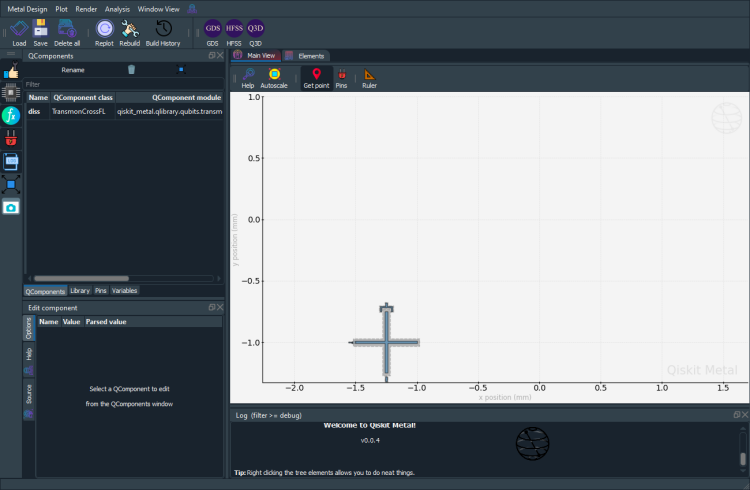

In [6]:
gui.screenshot()

In [7]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_diss = EPRanalysis(design, "hfss")

In [8]:
eig_diss.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [9]:
# update multiple settings
eig_diss.sim.setup.max_passes = 6
eig_diss.sim.setup.max_delta_f = 0.2
eig_diss.sim.setup.vars.Lj = '13.16 nH'
eig_diss.sim.setup.vars.Cj = '2 fF'

eig_diss.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.2,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '13.16 nH', 'Cj': '2 fF'}}

In [10]:
eig_diss.sim.run(name="Dissipator", components=['diss'], open_terminations=[], box_plus_buffer = False)
eig_diss.sim.plot_convergences()

INFO 03:42PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:42PM [load_ansys_project]: 	Opened Ansys App
INFO 03:42PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 03:42PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project40
INFO 03:42PM [connect_design]: 	Opened active design
	Design:    Logic_hfss [Solution type: Eigenmode]
INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:42PM [connect]: 	Connected to project "Project40" and design "Logic_hfss" 😀 

INFO 03:42PM [connect_design]: 	Opened active design
	Design:    Dissipator_hfss [Solution type: Eigenmode]
INFO 03:43PM [get_setup]: 	Opened setup `Setup6`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:43PM [analyze]: Analyzing setup Setup6
  df = pd.read_csv(io.StringIO(text2[3].strip()),

03:43PM 17s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\hfss_eig_f_convergence.csv


In [11]:
# eig_qb.setup.run    <- direct access
eig_diss.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': 'Dissipator', 'components': ['diss'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



In [12]:
#eig_diss.sim.save_screenshot()

In [13]:
eig_diss.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,1.067906
2,2.112623
3,3.315045
4,3.694701
5,3.886424
6,3.976592


In [14]:
eig_diss.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
#eig_diss.sim.save_screenshot()

INFO 03:43PM [get_setup]: 	Opened setup `Setup6`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [15]:
eig_diss.sim.clear_fields()

In [16]:
eig_diss.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': '',
   'line': ''}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [17]:
eig_diss.setup.junctions.jj.rect = 'JJ_rect_Lj_diss_rect_jj'
eig_diss.setup.junctions.jj.line = 'JJ_Lj_diss_rect_jj_'
eig_diss.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_diss_rect_jj',
   'line': 'JJ_Lj_diss_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [18]:
eig_diss.run_epr()

Design "Dissipator_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Dissipator_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 1.20840525952036e-24
        energy_elec_substrate = 1.10727234278193e-24
        EPR of substrate = 91.6%

        energy_mag    = 1.67791976439967e-26
        energy_mag % of energy_elec_all  = 1.4%
        

Variation 0  [1/1]

  Mode 0 at 3.98 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               98.6%  6.042e-25  8.39e-27



  df = df.drop('Unnamed: 9', 1)



    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.38%
	jj              0.749937  (+)        0.0123223
		(U_tot_cap-U_tot_ind)/mean=13.99%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9163087747743075


  df = pd.read_csv(io.StringIO(text2[3].strip()),

WARNING 03:43PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 03:43PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 28.0% is > 15%.                     
Is the simulation converged? Proceed with caution
ERROR 03:43PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 28.0% is > 15%.                     
Is the simulation converged? Proceed with caution



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project40\Dissipator_hfss\2021-12-07 15-43-21.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.328771
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.740808

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.98

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       154

*** Chi matrix ND (MHz) 
       168

*** Frequencies O1 PT (MHz)
0    3822.391829
dtype: float64

*** Frequencies ND (MHz)
0    3815.924206
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,13.16
eigenmode,
0,3822.39


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
13.16,0,168.04


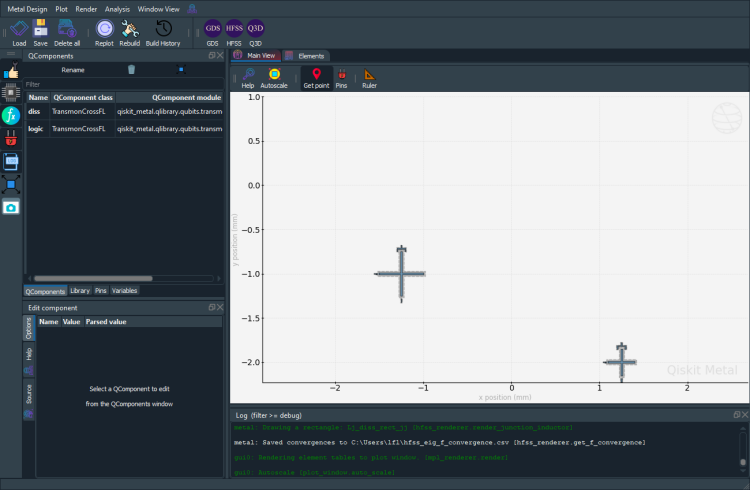

In [19]:
########### LOGICAL #########
options_l = dict(
    # Some options we want to modify from the defaults
    cross_width = '20um',
    cross_length = '150um',
    cross_gap = '20um',
    chip='main',
    # Adding 3 connectors 
    connection_pads=dict(
        readout_log_pin = dict(connector_location = '0', connector_type = '0'),
        ff_log_pin = dict(connector_location = '270', connector_type = '1'),
    )
)

q_l = TransmonCrossFL(design, 'logic', options = dict(
    pos_x='+1.25mm', pos_y='-2mm', orientation = '270', **options_l))

gui.rebuild()
gui.autoscale()
gui.screenshot()

In [20]:
eig_log = EPRanalysis(design, "hfss")

In [21]:
eig_log.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [22]:
# update multiple settings
eig_log.sim.setup.max_passes = 6
eig_log.sim.setup.max_delta_f = 0.2
eig_log.sim.setup.vars.Lj = '6.58 nH'
eig_log.sim.setup.vars.Cj = '2 fF'

eig_log.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.2,
 'max_passes': 6,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '6.58 nH', 'Cj': '2 fF'}}

In [23]:
eig_log.sim.run(name="Logic", components=['logic'], open_terminations=[], box_plus_buffer = False)
eig_log.sim.plot_convergences()

INFO 03:43PM [connect_design]: 	Opened active design
	Design:    Logic_hfss [Solution type: Eigenmode]
INFO 03:43PM [get_setup]: 	Opened setup `Setup6`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:43PM [analyze]: Analyzing setup Setup6
  df = pd.read_csv(io.StringIO(text2[3].strip()),

03:43PM 47s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\hfss_eig_f_convergence.csv


In [24]:
# eig_qb.setup.run    <- direct access
eig_log.sim.print_run_args()

This analysis object run with the following kwargs:
{'name': 'Logic', 'components': ['logic'], 'open_terminations': [], 'port_list': None, 'jj_to_port': None, 'ignored_jjs': None, 'box_plus_buffer': False}



In [25]:
#eig_log.sim.save_screenshot()

In [26]:
eig_log.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,1.432969
2,2.500070
3,3.876080
4,4.909265
5,5.112136
6,5.227786


In [27]:
eig_log.sim.plot_fields('main')   # TODO:::: Ez, normal component.....decide which field typically on the qbit, or on the crossing between meanders
#eig_log.sim.save_screenshot()

INFO 03:43PM [get_setup]: 	Opened setup `Setup6`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [28]:
eig_log.sim.clear_fields()

In [29]:
eig_log.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': '',
   'line': ''}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [30]:
eig_log.setup.junctions.jj.rect = 'JJ_rect_Lj_logic_rect_jj'
eig_log.setup.junctions.jj.line = 'JJ_Lj_logic_rect_jj_'
eig_log.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_logic_rect_jj',
   'line': 'JJ_Lj_logic_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [31]:
eig_log.run_epr()

Design "Logic_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Logic_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 8.20075388080867e-25
        energy_elec_substrate = 7.5124442462059e-25
        EPR of substrate = 91.6%

        energy_mag    = 6.46340933878273e-27
        energy_mag % of energy_elec_all  = 0.8%
        

Variation 0  [1/1]

  Mode 0 at 5.23 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.2%    4.1e-25 3.232e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



		Energy fraction (Lj over Lj&Cj)= 98.60%
	jj               1.50587  (+)        0.0213815
		(U_tot_cap-U_tot_ind)/mean=-19.42%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9160675171323522


WARNING 03:43PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 03:43PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 38.8% is > 15%.                     
Is the simulation converged? Proceed with caution
ERROR 03:43PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 38.8% is > 15%.                     
Is the simulation converged? Proceed with caution



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project40\Logic_hfss\2021-12-07 15-43-50.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.674051
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  1.474343

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       136

*** Chi matrix ND (MHz) 
       144

*** Frequencies O1 PT (MHz)
0    5091.973668
dtype: float64

*** Frequencies ND (MHz)
0    5088.236456
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,6.58
eigenmode,
0,5091.97


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
6.58,0,144.0


In [32]:
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

In [33]:
########## CPW RES ##########
from collections import OrderedDict
jogs_start = OrderedDict()
jogs_start[0] = ["R", '550um']
jogs_start[1] = ["R", '1500um']

RouteMeander(design, 'readout',  Dict(
        total_length='10.75 mm',
        hfss_wire_bonds = True,
        fillet='99 um',
        lead = Dict(start_straight='0.6mm',
                    start_jogged_extension = jogs_start,
            end_straight='0.2mm'),
        meander = Dict(asymmetry = '-100um'),
        trace_gap='9um',
        trace_width='15um',
        pin_inputs=Dict(
            start_pin=Dict(component='diss', pin='readout_diss_pin'),
            end_pin=Dict(component='logic', pin='readout_log_pin')), ))

name:    readout
class:   RouteMeander          
options: 
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'diss',                       
            'pin'               : 'readout_diss_pin',           
                             },
       'end_pin'           : {
            'component'         : 'logic',                      
            'pin'               : 'readout_log_pin',            
                             },
                        },
  'fillet'            : '99 um',                      
  'lead'              : {
       'start_straight'    : '0.6mm',                      
       'end_straight'      : '0.2mm',                      
       'start_jogged_extension': {
            0                   : ['R', '550um'],               
            1                   : ['R', '1500um'],              
                             },
       'end_jogged_extension': '',                           
                        },
  'total_length

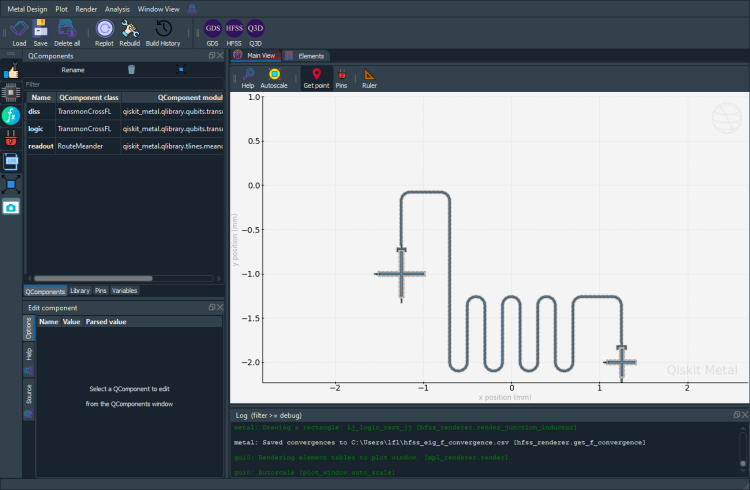

In [34]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [35]:
eig_rd = EPRanalysis(design, "hfss")

In [36]:
eig_rd.sim.run(name="Readout",
               components=['readout'],
               open_terminations=[('readout', 'start'), ('readout', 'end')])
eig_rd.sim.plot_convergences()

INFO 03:43PM [connect_design]: 	Opened active design
	Design:    Readout_hfss [Solution type: Eigenmode]
INFO 03:44PM [get_setup]: 	Opened setup `Setup4`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:44PM [analyze]: Analyzing setup Setup4
  df = pd.read_csv(io.StringIO(text2[3].strip()),

03:45PM 16s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\hfss_eig_f_convergence.csv


In [37]:
eig_rd.get_frequencies()

Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Readout_hfss" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.483039,inf


In [38]:
eig_rd.sim.plot_fields('main')

INFO 03:45PM [get_setup]: 	Opened setup `Setup4`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [39]:
##### TRANSMISSION LINE ######
def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='99.99um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        fillet=fillet,
        hfss_wire_bonds = True,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options_t)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

launch_options1 = dict(pos_x='-1990um', 
                       pos_y='0um', 
                       orientation='0', 
                       lead_length='30um', 
                       trace_width='cpw_width', 
                       trace_gap='cpw_gap')
launch_options2 = dict(pos_x='1990um', 
                       pos_y='0um', 
                       orientation='180', 
                       lead_length='30um', 
                       trace_width='cpw_width', 
                       trace_gap='cpw_gap')
options_t = Dict(
        lead=Dict(
            start_straight='0.35mm',
            end_straight='0.3mm'),
        trace_gap='cpw_gap',
        trace_width='cpw_width')

lp1 = LaunchpadWirebondCoupled(design, 'LP1', options = launch_options1)
lp2 = LaunchpadWirebondCoupled(design, 'LP2', options = launch_options2)
cpw_t = connect('cpw_t','LP1','tie','LP2','tie','3.78mm')

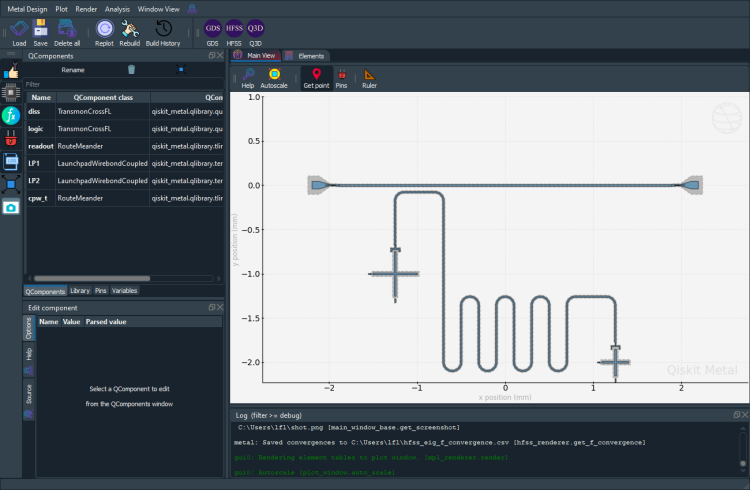

In [40]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [41]:
eig_qres = EPRanalysis(design, "hfss")

In [42]:
eig_qres.sim.setup.n_modes = 3
eig_qres.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 3,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [43]:
eig_qres.sim.run(name="FullDissipatorChip",
                 components=['diss', 'logic', 'readout'],
                 open_terminations=[])
eig_qres.sim.plot_convergences()

INFO 03:45PM [connect_design]: 	Opened active design
	Design:    FullDissipatorChip_hfss [Solution type: Eigenmode]
INFO 03:45PM [get_setup]: 	Opened setup `Setup3`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:45PM [analyze]: Analyzing setup Setup3
  df = pd.read_csv(io.StringIO(text2[3].strip()),

03:48PM 42s INFO [get_f_convergence]: Saved convergences to C:\Users\lfl\hfss_eig_f_convergence.csv


In [44]:
eig_qres.sim.plot_fields('main')

INFO 03:48PM [get_setup]: 	Opened setup `Setup3`  (<class 'pyEPR.ansys.HfssEMSetup'>)
